In [1]:
import numpy as np
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import pydicom as dicom
from skimage.util import img_as_ubyte

In [2]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "vertebra.png"

im_org = io.imread(in_dir + im_name)

Exercise 1

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2990771614.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


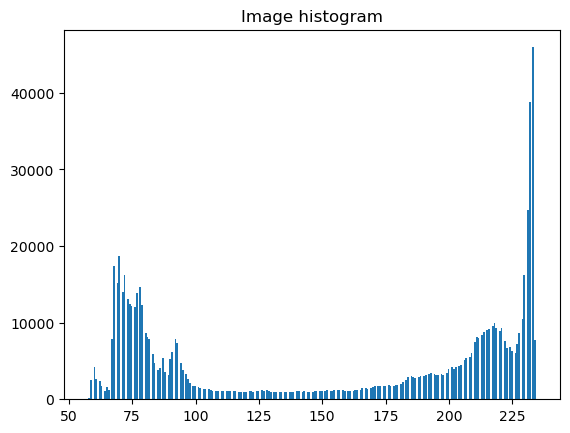

In [3]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\1841975238.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\1841975238.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


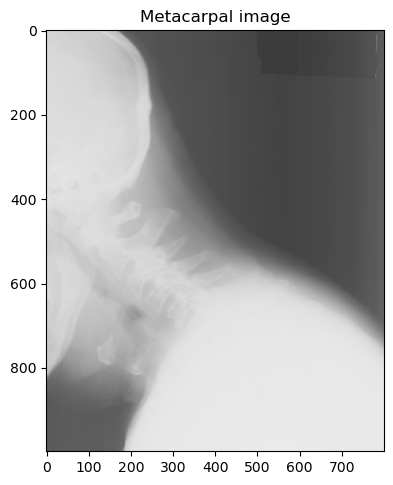

In [4]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

##### It looks like it would be hard to seperate bones from other tissue as it is not far off in color. However the background is another column on the histgram so that should be okay

Exercise 2


In [5]:
print("minimum pixel value: " + str(im_org.min()))
print("maximum pixel value: " + str(im_org.max()))

minimum pixel value: 57
maximum pixel value: 235


Exercise 3

In [6]:
floatImg = img_as_float(im_org)

print("minimum float val: " + str(floatImg.min()))
print("maximum float val: " + str(floatImg.max()))

#validation
print(floatImg.min() * 255)
print(floatImg.max() * 255)

minimum float val: 0.22352941176470587
maximum float val: 0.9215686274509803
56.99999999999999
235.0


Exercise 4

In [7]:
floatImgAsUByte = img_as_ubyte(floatImg)

print("minimum ubyte val: " + str(floatImgAsUByte.min()))
print("maximum ubyte val: " + str(floatImgAsUByte.max()))

minimum ubyte val: 57
maximum ubyte val: 235


They are as expected

Exercise 5

In [8]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0

    # Do something here
    img_out = (max_desired - min_desired) / (max_val - min_val) * (img_float - min_val) + min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

Exercise 6

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\3572067900.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(stretchedIm)
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\3572067900.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


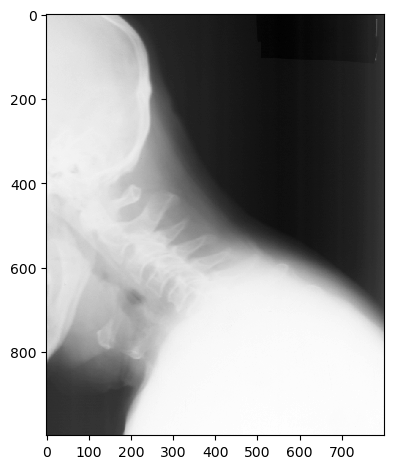

In [9]:
stretchedIm = histogram_stretch(im_org)

io.imshow(stretchedIm)
io.show()

Higher contrast. Easier to seperate background and actual tissue, it is also easier to see the vertabre

Exercise 7

In [10]:
def gamma_map(img, gamma):
    floatImg = img_as_float(img)
    gammaImg = np.power(floatImg, gamma)

    return img_as_ubyte(gammaImg)

Exercise 8

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2738534010.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gamma_map(im_org, gamma=0.5))
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2738534010.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


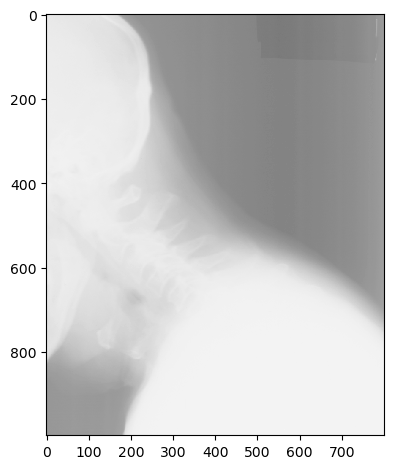

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2738534010.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gamma_map(im_org, gamma=2.0))
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2738534010.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


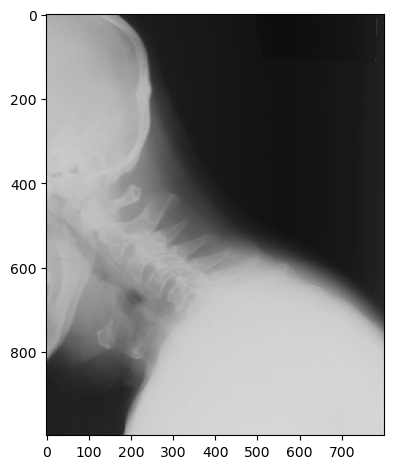

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2738534010.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2738534010.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


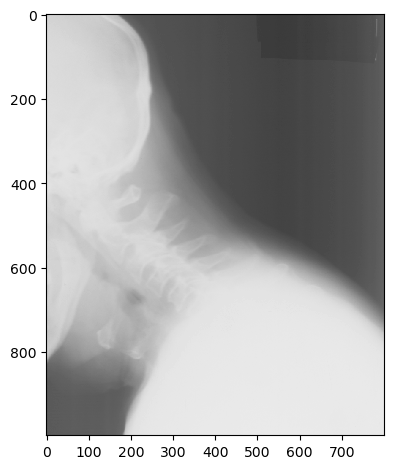

In [11]:
io.imshow(gamma_map(im_org, gamma=0.5))
io.show()

io.imshow(gamma_map(im_org, gamma=2.0))
io.show()

io.imshow(im_org)
io.show()

low gamma brightens image, high gamma darkens

Exercise 9

In [12]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The threshold value in the range [0, 255]
    :return: Resulting image (uint8) where background is 0 and foreground is 255
    """
    float_img = img_as_float(img_in)
    thres_norm = thres / 255.0

    # Boolean mask → float [0,1]
    mask = (float_img >= thres_norm).astype(float)

    return img_as_ubyte(mask)

Exercise 10

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\654140072.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(threshold_image(im_org, thres=127))
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\654140072.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


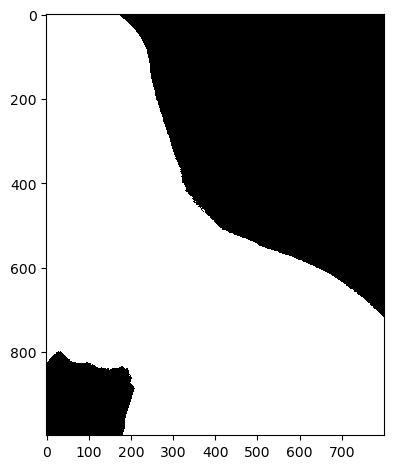

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\654140072.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(threshold_image(im_org, thres=190))
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\654140072.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


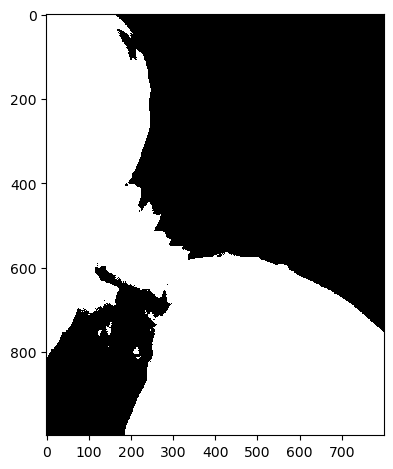

In [13]:
io.imshow(threshold_image(im_org, thres=127))
io.show()

io.imshow(threshold_image(im_org, thres=190))
io.show()

Exercise 11

Optimal threshold: 148


C:\Users\frede\AppData\Local\Temp\ipykernel_24312\3554789221.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(threshold_image(im_org, thres=optimal_thresh))
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\3554789221.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


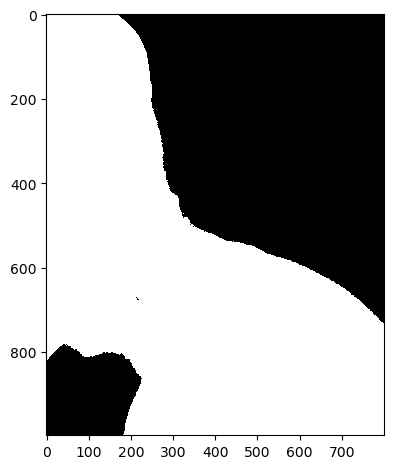

In [14]:
from skimage.filters import threshold_otsu

optimal_thresh = threshold_otsu(im_org)

print("Optimal threshold: " + str(optimal_thresh))

io.imshow(threshold_image(im_org, thres=optimal_thresh))
io.show()

Mine is very close, result is almost the same

Exercise 12

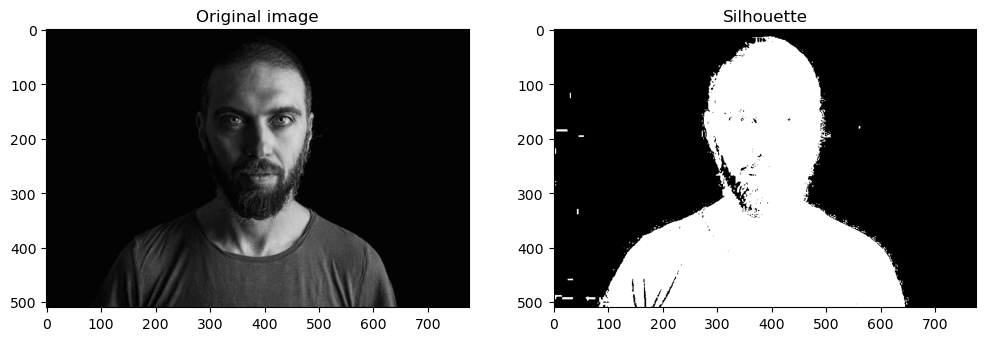

In [15]:
from skimage.color import rgb2gray

im_name = "dark_background.png"
im_org = io.imread(in_dir + im_name)

im_org = img_as_float(im_org)
im_gray = img_as_ubyte(rgb2gray(im_org))

thres = 5
im_thres = threshold_image(im_gray, thres = thres)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_gray, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title(f'Silhouette')
plt.show()

Exercise 13 & 14

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2153612629.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2153612629.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


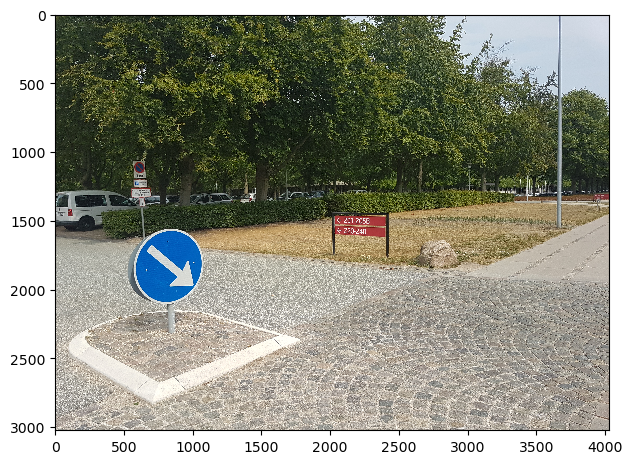

In [16]:
im_name = "DTUSigns2.jpg"
im_org = io.imread(in_dir + im_name)

io.imshow(im_org)
io.show()

In [17]:
def detect_dtu_signs_blue(img_in):
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]

    segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
           (b_comp > 180) & (b_comp < 200)

    return img_as_ubyte(segm)

In [18]:
def detect_dtu_signs_blue_red(img_in, sign):
    r_comp = img_in[:, :, 0]
    g_comp = img_in[:, :, 1]
    b_comp = img_in[:, :, 2]

    if sign == 'red':
        segm = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)
    if sign == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                    (b_comp > 180) & (b_comp < 200)

    return img_as_ubyte(segm)

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\650167574.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(detect_dtu_signs_blue(im_org))
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\650167574.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


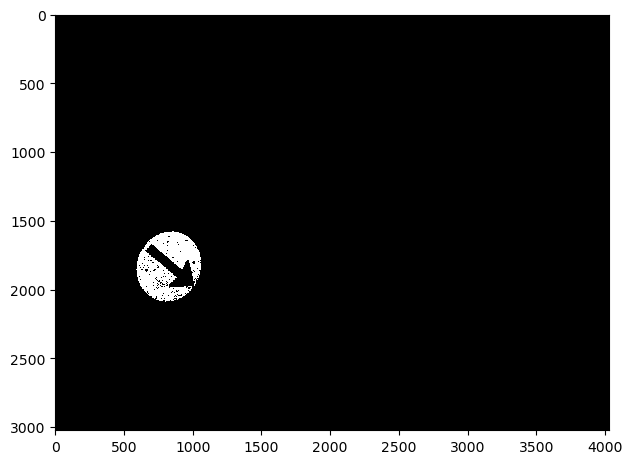

In [19]:
io.imshow(detect_dtu_signs_blue(im_org))
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\1643339362.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(detect_dtu_signs_blue_red(im_org, 'red'))
C:\Users\frede\miniforge3\envs\course02503\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\frede\AppData\Local\Temp\ipykernel_24312\1643339362.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


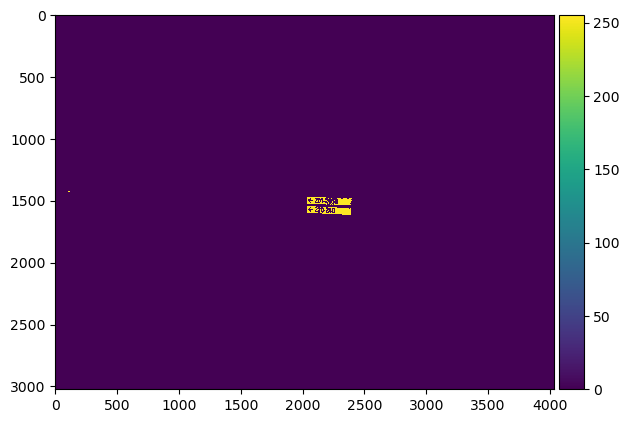

In [20]:
io.imshow(detect_dtu_signs_blue_red(im_org, 'red'))
io.show()

Exercise 15

C:\Users\frede\AppData\Local\Temp\ipykernel_24312\2642756930.py:16: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


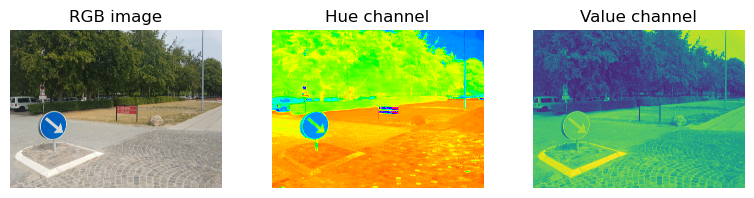

In [21]:
hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

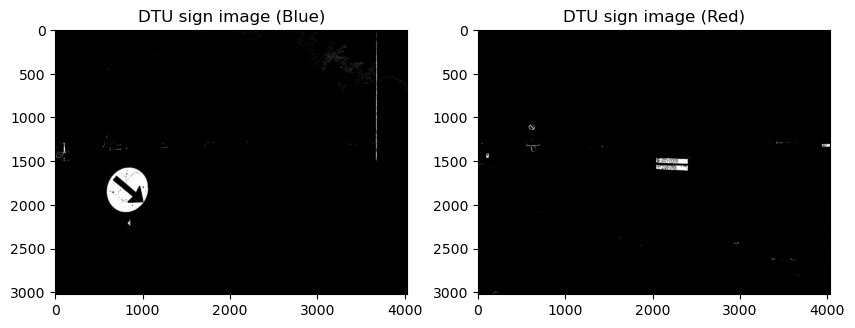

In [22]:
plt.close()

segm_blue = (hue_img < 0.6) & (hue_img  > 0.4) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img  > 0.9)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title('DTU sign image (Blue)')

ax2.imshow(segm_red, cmap = 'gray')
ax2.set_title('DTU sign image (Red)')
plt.show()

## Real time pixelwise operations on videos

Exercise 16-18

In [26]:
!python ./data/Ex3-VideoPixelWiseOperations.py


Starting image capture
Opening connection to camera
Starting camera loop
Can't receive frame. Exiting ...
Stopping image loop


[ WARN:0@7.221] global cap_msmf.cpp:476 `anonymous-namespace'::SourceReaderCB::OnReadSample videoio(MSMF): OnReadSample() is called with error status: -1072875772
[ WARN:0@7.221] global cap_msmf.cpp:488 `anonymous-namespace'::SourceReaderCB::OnReadSample videoio(MSMF): async ReadSample() call is failed with error status: -1072875772
[ WARN:1@7.221] global cap_msmf.cpp:1795 CvCapture_MSMF::grabFrame videoio(MSMF): can't grab frame. Error: -1072875772


In [27]:
!python ./data/Ex3-Ex17.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


In [28]:
!python ./data/Ex3-Ex18.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
